In [22]:
import re
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [104]:
df_rent_score1 = pd.read_excel("rent_score_amenity_count.xlsx")
df_rent_score1

,Location,Area code,Area,Price(in Euros),Beds,Bathroom,House_type,score,amenity_count,property_latitude,property_longitude
0,1 Finsbury Green|| Churchtown|| Dublin 14,D14,Dublin 14,2150,3,3,House to Rent,17.95,31,53.293447,-6.254306
1,1 Friarsland Roebuck Road|| Dublin 14|| Clonsk...,D14,Dublin 14,4650,5,4,House to Rent,18.60,23,53.304121,-6.234226
2,1 Montpelier Gardens|| Arbour Hill|| Dublin 7,D07,Dublin 7,2300,4,2,House to Rent,11.15,18,53.350443,-6.295565
3,1 Mountainview Road|| Ranelagh|| Dublin 6,D06,Dublin 6,2250,1,2,Apartment to Rent,20.10,34,53.320901,-6.251439
4,1 Old Distillery Apartments|| Smithfield|| Dub...,D01,Dublin 1,2400,3,2,Apartment to Rent,120.80,182,53.349084,-6.273264
...,...,...,...,...,...,...,...,...,...,...,...
1829,the rise|| Glasnevin|| Dublin 9,D09,Dublin 9,1350,2,2,Studio apartment to Rent,23.40,33,53.378367,-6.262805
1830,waterloo road|| Ballsbridge|| Dublin 4,D04,Dublin 4,850,2,2,Studio apartment to Rent,50.55,81,53.330835,-6.244263
1831,waterstown avenue|| Palmerstown|| Dublin 20,D20,Dublin 20,3000,4,3,House to Rent,14.10,20,53.357793,-6.371847
1832,whithefair|| Dublin 2,D02,Dublin 2,1700,1,1,Apartment to Rent,175.70,258,53.340121,-6.268679


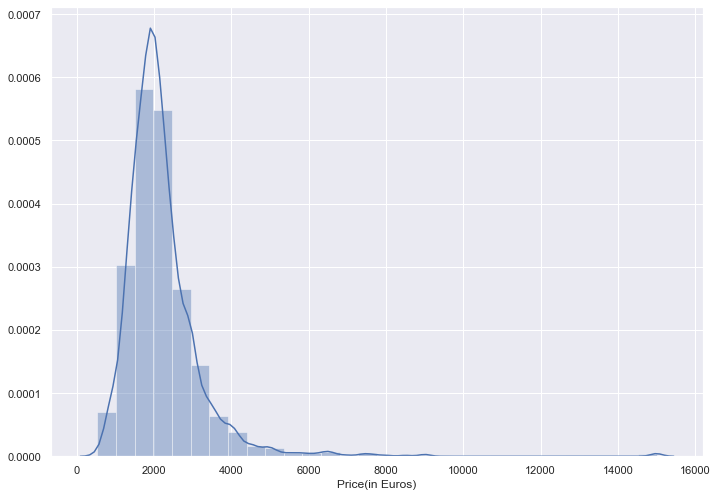

In [63]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_rent_score1['Price(in Euros)'], bins=30)
plt.show()

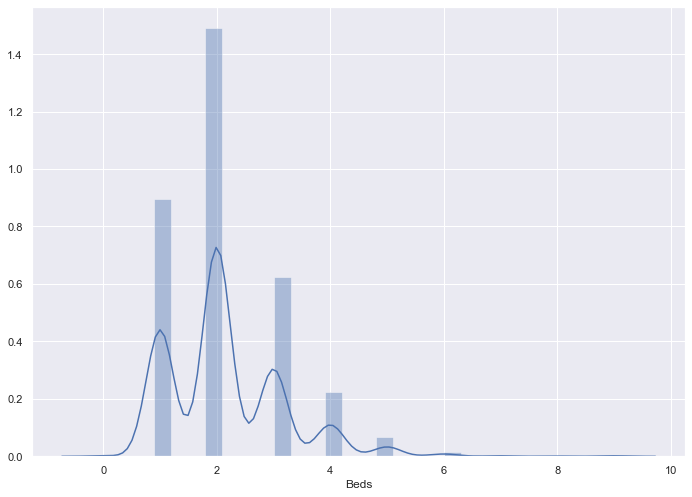

In [64]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_rent_score1['Beds'], bins=30)
plt.show()

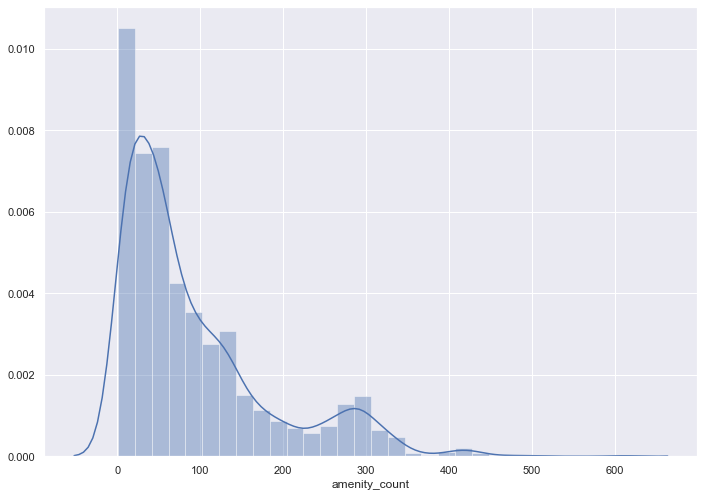

In [89]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_rent_score1['amenity_count'], bins=30)
plt.show()

In [105]:
df =df_rent_score1.drop(columns=['amenity_count','property_latitude','property_longitude'])
# df.sort_values(by='Area')

In [108]:
# df = df.astype({"Price":int})
df.rename(columns={'Area code':'Area_code','Price(in Euros)':'Price'},inplace=True)
df.sort_values(by='Area_code',inplace=True)

In [109]:
df

,Location,Area_code,Area,Price,Beds,Bathroom,House_type,score
1175,Marlborough Street 43-46|| IFSC|| Dublin 1,D01,Dublin 1,1500,1,1,Apartment to Rent,177.60
1258,North Frederick Street|| Dublin 1,D01,Dublin 1,1400,1,1,Apartment to Rent,150.35
1257,North Circular|| North Circular Road|| Dublin 1,D01,Dublin 1,1690,2,1,Apartment to Rent,36.05
1255,North Circular Road|| North Circular Road|| Du...,D01,Dublin 1,1400,1,1,Flat to Rent,75.45
1248,Norh Wall Quay|| IFSC|| Dublin 1,D01,Dublin 1,3150,2,2,Apartment to Rent,35.95
...,...,...,...,...,...,...,...,...
1567,Suncroft Drive|| Tallaght|| Dublin 24,D24,Dublin 24,2000,2,1,House to Rent,15.15
569,Beechdale Road|| Ballycullen|| Dublin 24,D24,Dublin 24,2500,4,3,House to Rent,0.20
1059,Hunterswood|| Ballycullen|| Dublin 24,D24,Dublin 24,1200,1,1,Apartment to Rent,2.65
50,128 donomore crescent|| Tallaght|| Dublin 24,D24,Dublin 24,1000,3,1,Studio apartment to Rent,6.30


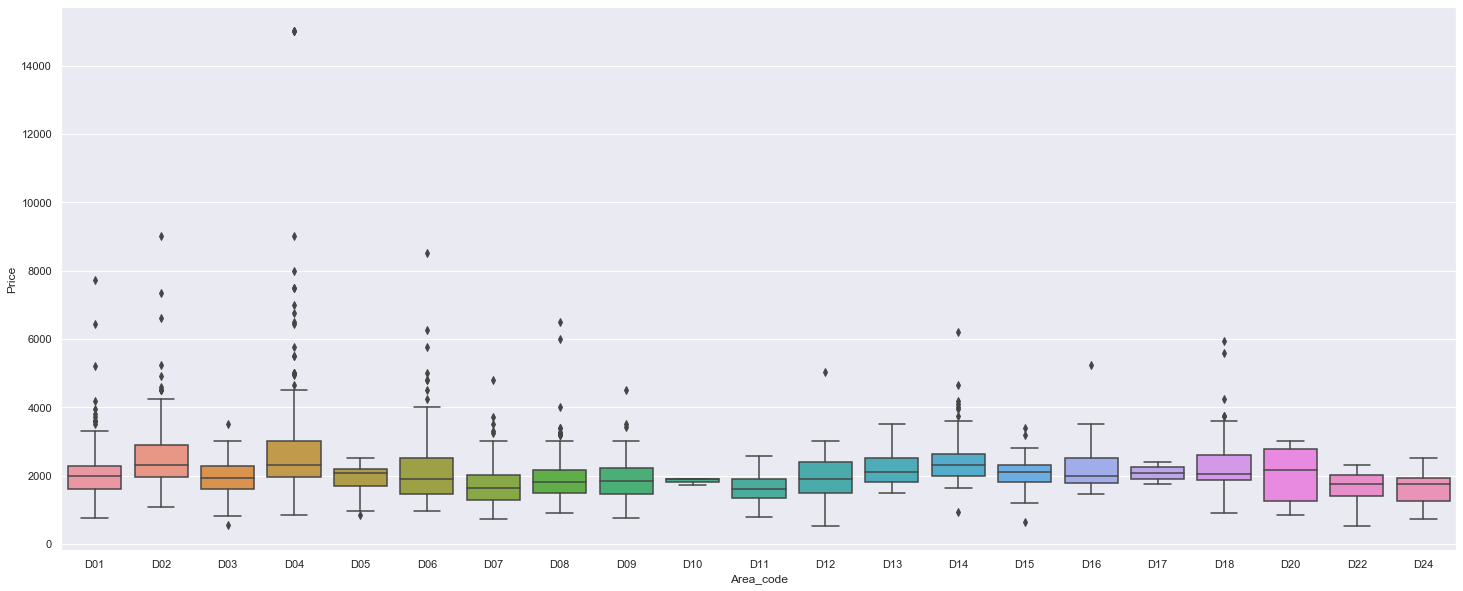

In [110]:
plt.figure(figsize=(25,10))
# sns.boxplot(x=df.Area_code, y=df.Price)
sns.boxplot(x=df.Area_code, y=df.Price)

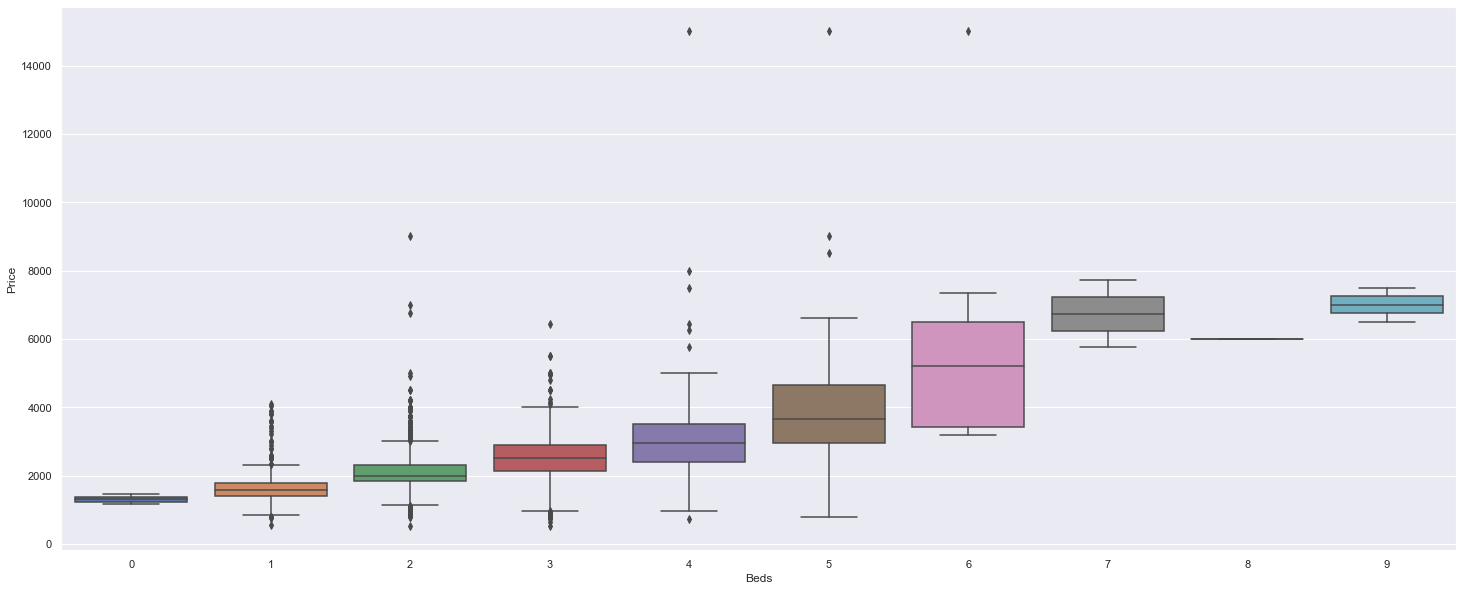

In [100]:
plt.figure(figsize=(25,10))
# sns.boxplot(x=df.Area_code, y=df.Price)
sns.boxplot(x=df.Beds, y=df.Price)

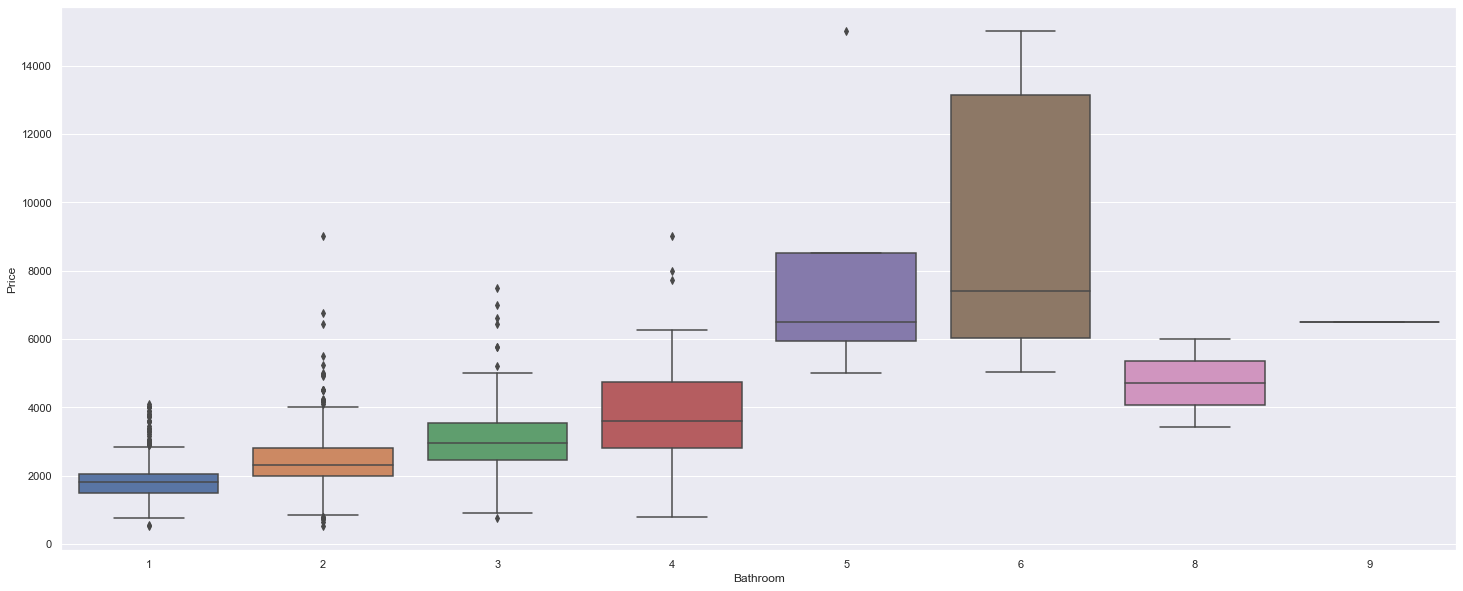

In [102]:
plt.figure(figsize=(25,10))
# sns.boxplot(x=df.Area_code, y=df.Price)
sns.boxplot(x=df.Bathroom, y=df.Price)

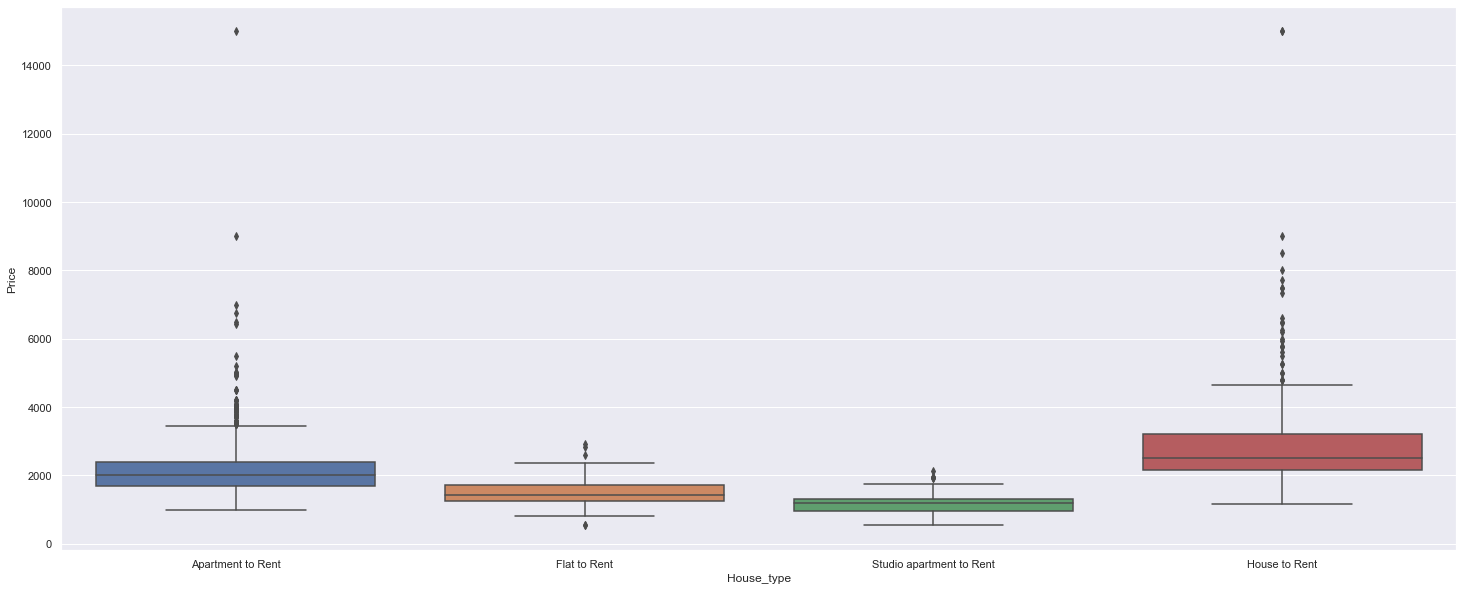

In [103]:
plt.figure(figsize=(25,10))
# sns.boxplot(x=df.Area_code, y=df.Price)
sns.boxplot(x=df.House_type, y=df.Price)

In [114]:
# plt.figure(figsize=(25,10))
# # sns.boxplot(x=df.Area_code, y=df.Price)
# sns.boxplot(x=df.score, y=df.Price)

In [112]:
df.corr()

,Price,Beds,Bathroom,score
Price,1.000000,0.561710,0.600501,-0.030071
Beds,0.561710,1.000000,0.691555,-0.225456
Bathroom,0.600501,0.691555,1.000000,-0.216983
score,-0.030071,-0.225456,-0.216983,1.000000


(4.0, 0.0)

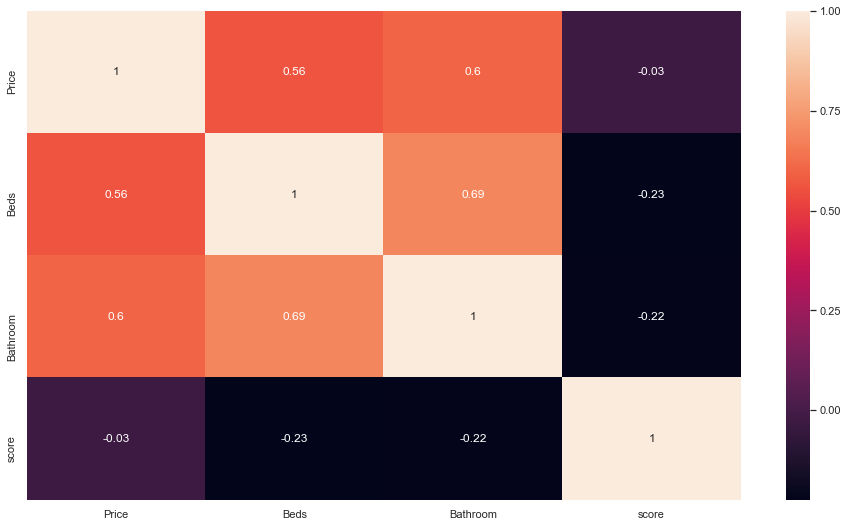

In [111]:
plt.figure(figsize=(16,9))
correlation_matrix = df.corr()
ax = sns.heatmap(data=correlation_matrix, annot=True)
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5)

In [93]:
plt.figure(figsize=(16,9))
correlation_matrix = df.corr()
ax = sns.heatmap(data=df, annot=True)
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<Figure size 1152x648 with 0 Axes>